# DB 3일차

### A many-to-one relationship

<b>개요</b>  

관계형 데이터베이스에서의 외래키 속성을 사용해 모델간 N:1 관계 설정하기  

### Intro

<b>RDB(관계형 데이터베이스) 복습</b>  

데이터를 테이블, 행, 열 등으로 나누어 구조화하는 방식  

RDB의 모든 테이블에는 행에서 고유하게 식별 가능한 기본키라는 속성이 있으며,  
<mark>외래키</mark>를 사용하여 각 행에서 다른 테이블 간의 <mark>관계</mark>를 만드는데 사용할 수 있음

&nbsp;

<b>테이블 간의 관계 예시</b>  

**주문 테이블**

|주문 id|
|:---:|
|제품명|
|주문일|
|배송일|
|주문상태|

**고객 테이블**

|고객 id(primary key)|
|:---:|
|이름|
|주소지|
|배송지|

다음과 같이 어떠한 서비스의 데이터베이스에 고객 테이블과 주문 테이블 존재  

고객 테이블에는 고객에 관한 데이터가, 주문 테이블에는 주문에 관한 거래 정보가 포함됨  

&nbsp;

|주문 id|제품명|주문일|배송일|주문상태|
|:---:|:---:|:---:|:---:|:---:|
|1|생수|2000-01-01|2000-01-03|배송중|
|2|영양제|2000-01-02|2000-01-07|배송 준비중|
|3|음료수|2000-01-03|2000-01-05|배송중|

만약 고객들이 특정 제품을 주문한다면 주문 테이블에 레코드가 생성  

그런데 해당 주문이 올바르게 배송되기 위해서는 어떤 고객이 주문했는지를 알아야 함  
- 즉, 배송지 주소를 가지고 있는 고객 테이브르이 정보를 포함해야 함  

주문 테이블에서 어떻게 고객 테이블 정보를 포함할 수 있을까?  

&nbsp;

|주문 id|제품명|주문일|배송일|주문상태|고객정보|
|:---:|:---:|:---:|:---:|:---:|:---:|
|1|생수|2000-01-01|2000-01-03|배송중|김진수|
|2|영양제|2000-01-02|2000-01-07|배송 준비중|박영희|
|3|음료수|2000-01-03|2000-01-05|배송중|김진수|

각 주문 데이터에 고객 정보를 입력하는 방법이 있음  

하지만 이렇게 이름으로 저장할 경우 이름이 같은 다른 사용자를 구분할 수 없음  

그렇다면 고객 정보를 어떤 데이터를 사용하는 것이 적합한가?  

&nbsp;

|주문 id|제품명|주문일|배송일|주문상태|고객id|
|:---:|:---:|:---:|:---:|:---:|:---:|
|1|생수|2000-01-01|2000-01-03|배송중|2|
|2|영양제|2000-01-02|2000-01-07|배송 준비중|1|
|3|음료수|2000-01-03|2000-01-05|배송중|2|

고객 정보의 기본키인 고객 id 정보를 저장하는 방법이 있음  

이처럼 관계형 데이터베이스에서 한 테이블의 필드 중 다른 테이블의 행을 식별할 수 있는 키를 외래 키(foriegn key, FK)라 함  

&nbsp;

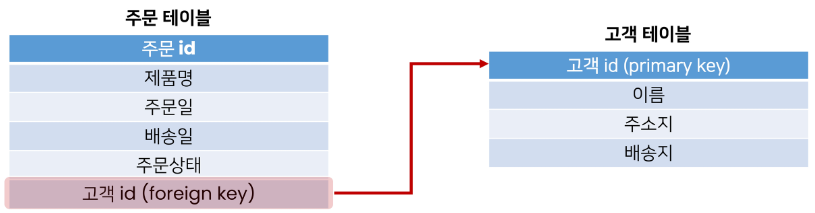

이렇게 되면 이 두 테이블은 공유된 고객 idㄹ르 기반으로 연결되며 다양한 명령 처리를 진행할 있음  
- 특정 날짜에 구매한 모든 고객 정보 확인하기  
- 지난 달에 배송이 지연된 주문을 받은 고객 처리하기  
- 특정 고객이 주문한 모든 주문 정보 조회하기 ... 등  

실제 상황보다는 간단한 예시지만 이처럼 RDB는 데이터 간의 매우 복잡한 관계를 보여주고 처리하는 데 탁월한 방식  

<b>RDB에서의 관계</b>  

1. 1:1
- One-to-one relationships
- 한 테이블의 레코드 하나가 다른 테이블의 레코드 단 한 개와 관련된 경우  

2. <mark>N:1</mark>  
- Many-to-one relationships
- 한 테이블의 0개 이상의 레코드가 다른 테이블의 한 개와 관련된 경우  
- 기준 테이블에 따라 (1:N, One-to-many relationships)이라고도 함  

3. M:N  
- Many-to-many relationships
- 한 테이블의 0개 이상의 레코드가 다른 테이블의 0개 이상의 레코드와 관련된 경우  
- 양쪽 모두에서 N:1 관계를 가짐  

&nbsp;

<b>Many-to-one relationships 예시</b>  

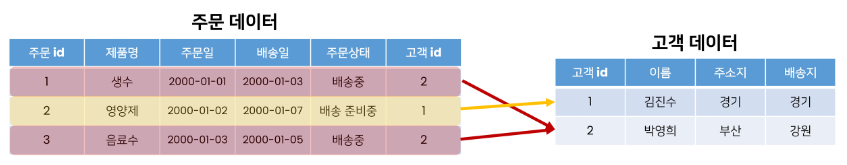

여러 개의 주문 입장에서 각각 어떤 주문에 속해 있는지 표현해야 하므로  
고객 테이블의 PK를 주문 테이블에 FK로 집어 넣어 관계를 표현  

고객(1)은 여러 주문(N)을 진행할 수 있음  

<font color="red">만약 고객이 단 한 개의 주문만 생성할 수 있다면 두 테이블은 1:1 관계라 할 수 있음</font>

### Foreign key

<b>개념</b>  

외래키(외부키)  

관계형 데이터베이스에서 다른 테이블의 행을 식별할 수 있는 키  

참조되는 테이블의 기본키(Primary key)를 가리킴  

참조하는 테이블의 행 1개의 값은, 참조되는 측 테이블의 행 값에 대응됨  
- 이 대문에 참조하는 테이브르이 행에는, 참조되는 테이블에 나타나지 않는 값을 포함할 수 없음  

참조하는 테이블 행 여러 개가, 참조되는 테이블의 동일한 행을 참조할 수 있음  

&nbsp;

<b>특징</b>  

키를 사용하여 부모 테이블의 유일한 값을 참조(by 참조 무결성)  

외래 키의 값이 반드시 부모 테이블의 기본키일 필요는 없지만 유일한 값이어야 함  

&nbsp;

<b>[참고] 참조 무결성</b>  

데이터베이스 관계 모델에서 관련된 2개의 테이블 간의 일관성을 말함  

외래 키가 선언된 테이블의 외래 키 속성(열)의 값은 그 테이블의 부모가 되는 테이블의 키본키 값으로 존재함  


### N:1 (Comment - Article)

<b>개요</b>  

Comment(N) - Article(1)  

Comment 모델과 Article 모델 간의 관계 설정  

"0개 이상의 댓글은 1개의 게시글에 작성될 수 있음"  

### 모델 관계 설정  

게시판의 게시글과 N:1 관게를 나타낼 수 있는 댓글 구현  

N:1 관계에서 댓글을 담당할 Comment 모델은 N, Article 모델은 1이 될 것  

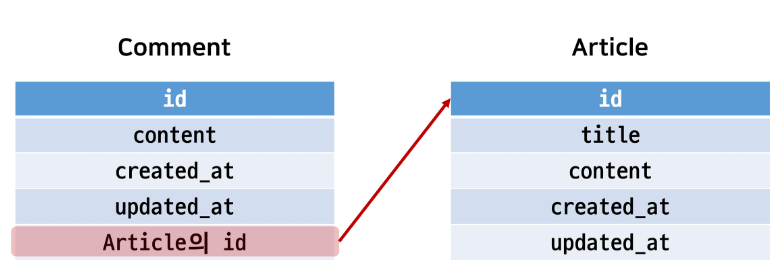

<hr>

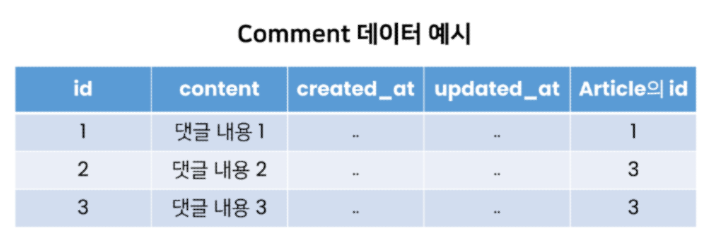

만약 comment 테이블에 데이터가 다음과 같이 작성되었다면  
1번 게시글에는 1개의 댓글이, 3번 게시글에는 2개의 댓글이 작성되어 있다고 볼 수 있음  

### Django Relationship fields

<b>Django Relationship fields의 종류</b>  

1. OnetoOneField()
- A one-to-one relationship

2. <mark>ForeignKey()</mark>  
- A many-to-one relationship

3. ManyToManyField()
- A many-to-many relationship

&nbsp;

<b>ForeignKey(to, on_delete, **options)</b>  

A many-to-one relationshiop을 담당하는 Django의 모델 필드 클래스  

Django 모델에서 관계형 데이터베이스의 외래키 속성을 담당  

2개의 필수 위치 인자가 필요  
1. 참조하는 <mark>model class</mark>
2. <mark>on_delete</mark> 옵션

<a href="https://docs.djangoproject.com/en/3.2/ref/models/fields/">https://docs.djangoproject.com/en/3.2/ref/models/fields/</a>

### Comment Model  

<b>Comment 모델 정의</b>  

```python
# articles/models.py

class Comment(models.Model):
    article = models.ForeignKey(Article, on_delete=models.CASCADE)
    content = models.CharField(max_length=200)
    created_at = models.DateTimeField(auto_now_add=True)
    updated_at = models.DateTimeField(auto_now=True)

    def __str__(self):
        return self.content
```

외래키 필드는 Foreign Key 클래스를 작성하는 위치와 관계없이 필드의 마지막에 작성됨  

ForeginKey() 클래스의 인스턴스 이름은 참조하느 모델 클래스 이름의 단수형(소문자)으로  
작성하는 것을 권장함  (이유는 이어지는 모델 참조에서 확인 예정)  


<b>Foreign Key arguments - <mark>on_delete</mark></b>

외래키가 참조하는 객체가 사라졋을 때, 외래키를 가진 객체를 어떻게 처리할 지를 정의  

데이터 무결성을 위해서 매우 중요한 설정  

on_delete 옵션 값  

- <mark>CASCADE</mark>: 부모 객체(참조된 객체)가 삭제되었을 때 이를 참조하느 객체도 삭제  
- PROTECT, SET_NULL, SET_DEFAULT ... 등 여러 옵션 값들이 존재  
- 수업에서는 CASCADE 값만 사용할 예정  

& nbsp;

<b>Migration 과정 진행</b>  

1. models.py에서 모델에 대한 수정사항이 발생했기 때문에 migration 과정을 진행  

```bash
$python manage.py makemigrations
```

2. 마이그레이션 파일 0002_comment.py 생성 확인  

3. migrate 진행

```bash
$python manage.py migrate
```

migrate 후 Comment 모델 클래스로 인해 생성된 테이블 확인  

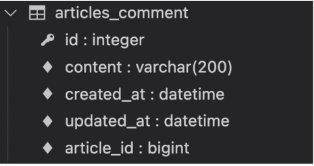

Foregin Key 모델 필드로 인해 작성된 컬럼의 이름이 <mark>article_id</mark>인 것을 확인  

만약 Foreign Key 인스턴스를 article이 아닌 abcd로 생성했다면 abcd_id로 만들어짐  
- 이처럼 명시적인 모델 관계를 파악을 위해 참조하는 클래스의 이름의 소문자(단수형)로 작성하는 것이 권장되었던 이유  


<b>댓글 생성 연습하기</b>  

```bash
$python manage.py shell_plus
```

&nbsp;

1. 댓글 생성하기

```bash
# Comment 클래스의 인스턴스 comment 생성
$comment = Comment()
```

```bash
# 인스턴스 변수 저장  
$comment.content = 'first comment'
```

```bash
# DB에 댓글 저장  
$comment.save()
```

```bash
# 에러 발생 
# articles_comment 테이블의 Foreign
```

```bash
# 게시글 생성 및 확인
$article = Article.objects.create(title='title', content='content')
$article
```

```bash
# 외래키 데이터 입력
# 다음과 같이 article 객체 자체를 넣을 수 있음  
$comment.article = article
# 또는 comment.article_id = article.pk 처럼 pk 값을 직접 외래키 컬럼에 넣어 줄 수도 있지만 권장하지 않음  

# DB에 댓글 저장 및 확인  
$comment.save()
$comment
```

2. 댓글 속성 값 확인  

```bash
$comment.content
```

```bash
# 클래스 변수명인 article로 조회 시 해당 참조하는 게시물 객체를 객체로 조회할 수 있음
$comment.article
```

```bash
# article_pk는 존재하지 않는 필드이기 때문에 사용 불가  

$comment.article_id
```

&nbsp;

3. comment 인스턴스를 통한 article 값 접근하기  

```bash
# 1번 댓글이 작성된 게시물의 pk 조회
$comment.article.pk

# 1번 댓글이 작성된 게시물의 content 조회
$comment.article.content
```

&nbsp;

4. 두 번째 댓글 작성해보기  

```bash
$comment = Comment(content='second', article='article')
$comment.save()
$comment.pk
$comment
$comment.article_id
```

### 관계 모델 참조  

<b>Related manager</b>  

Related manager는 N:1 혹은 M:N 관계에서 사용가능한 문맥(context)  

Django는 모델 간 N:1 혹은 M:N 관계가 설정되면 <mark>역참조</mark>할 때에 사용할 수 있는 manager를 생성  
- 우리가 이전에 모델 생성 시 <mark>objects</mark>라는 매니저를 통해 querset api를 사용했던 것처럼  
- related manger를 통한 queryset api를 사용할 수 있게 됨  


지금은 N:1 관계에서의 related manager 만을 학습할 것  
<a href="https://docs.djangoproject.com/en/3.2/ref/models/relations/">https://docs.djangoproject.com/en/3.2/ref/models/relations/</a>

<b>역참조</b>  

나를 참조하는 테이블(나를 외래키로 지정한)을 참조하는 것  

즉, 본인을 외래키로 참조 중인 다른 테이블에 접근하는 것  

N:1 관계에서 1이 N을 참조하는 상황  
- 외래 키를 가지지 않는 1이 외래 키를 가진 N을 참조  

&nbsp;

```python
article.comment_set.method()
```

Article 모델이 Comment 모델을 참조(역참조)할 때 사용하는 매니저  

article.comment 형식으로는 댓글 객체를 참조할 수 없음  
- 실제로 Article 클래스에는 Comment와의 어떠한 관계도 작성되어 있지 않음  

대신 Django가 역참조할 수 있는 <mark>comment_set</mark> manager를 자동으로 생성해  
article.comment_set 형태로 댓글 객체를 참조할 수 있음  
<mark>N:1 관계에서 생성되는 Related mananger의 이름은 참조하는 "모델명_set" 이름 규칙으로 만들어짐</mark>  

반면 참조 상황(Comment -> Article)에서는 실제 Foreign Key 클래스로 작성한  
인스턴스가 Comment 클래스의 클래스 변수이기 때문에 comment.article 형태로 작성 가능함  

<b>Related manager 연습하기</b>  

shell_plus 실행  

```bash
$python manange.py shell_plus
```

&nbsp;

1. 1번 게시글 조회하기

```bash
$article = Article.object.get(pk=1)
```

2. dir() 함수를 사용해 클래스 객체가 사용할 수 있는 메서드 확인하기  

```bash
$dir(article)
```

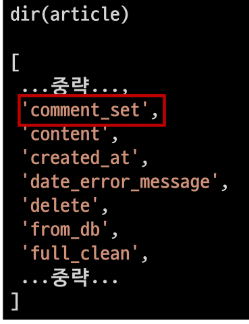

3. 1번 게시글에 작성된 모든 댓글 조회하기 (역참조)  

```bash
$article.comment_set.all()
```

4. 1번 게시글에 작성된 모든 댓글 출력하기  

```python
comments = article.comment_set.all()

for comment in comments:
    print(comment.content)
```

<b>Foreign Key arguments - <mark>related_name</mark></b>  

```python
# articles/modesl.py
class Comment(models.Model):
    article = models.ForeignKey(Article, on_delete=models.CASCADE, related_name='comments')
```

Foreign Key 클래스의 선택 옵션  

역참조 시 사용하는 매니저 이름 (model_set manager)을 변경할 수 있음  

작성 후, migration 과정이 필요  

선택 옵션이지만 상황에 따라 반드시 작성해야 하는 경우가 생기기도 하는데, 이는 추후 자연스럽게 만나볼 예정  

작성 후 원래 코드로 복구  
<font color="red">위와 같이 변경하면 기존 article.comment_set은 더 이상 사용할 수 없고, article.comments로 대체됨</font>  

<b>admin site 등록</b>

```python
# articles/admin.py

from django.contrib import admin
from .models import Article, Comment

# Register your models here.
admin.site.register(Article)
admin.site.register(Comment)
```

### Comment 구현

<b>CREATE</b>

사용자로부터 댓글 데이터를 입력 받기 위한 CommentForm 작성  

```python
# articles/forms.py

from .models import Article, Comment

class CommentForm(forms.ModelForm):

    class Meta:
        model = Comment
        fields = '__all__'
```

&nbsp;

detail 페이지에서 CommentForm 출력 (view함수)  

```python
# articles/views.py

from .models import Article, Comment

def detail(request, pk):
    article = Article.objects.get(pk=pk)
    comment_form = CommentForm()
    context = {'article': article,
               'comments': comments,}
    return render(request, 'articles/detail.html', context)
```

<font color='red'>기존에는 ArticleForm 클래스인 인스터명을 form으로 작성했기 때문에 햇갈리지 않도록 comment_form으로 작성</font>  

&nbsp;

detail 페이지에서의 CommentForm 출력(템플릿)  

```python
# articles/templates/articles/detail.html

{% extends 'base.html' %} 

{% block content %}
    ...
    <form action="#" method = "POST">
      {% csrf_token %}
      {{ comment_form }}
      <input type="submit" value="작성">
    </form>
{% endblock content %}

```

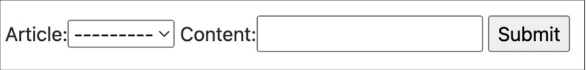

detail 페이지에 출력된 CommentForm을 살펴보면 다음과 같이 출력됨  

실 서비스에서는 댓글을 작성할 때 댓글을 어떤 게시글에 작성하는지 직접 게시글 번호를 선택하지 않음  

실제로는 해당 게시글에 댓그을 작성하면 자연럽게 그 게시글에 댓글이 작성되어야 함  

다음과 같이 출력되는 이유는 Comment 클래스의 외래 키 필드 article 또한 데이터 입력이 필요하기 때문에 출력되고 있는 것  

하지만 외래키 <mark>사용자의 입력으로 받는 것이 아니라 view 함수 내에서 받아  별도로 처리되어 저장</mark>되어야 함

외래키 필드를 출력에서 제외 후 확인  

```python
# articles/forms.py

class CommentForm(forms.ModelForm):

    class Meta:
        model = Comment
        exclude = ('article',)
```

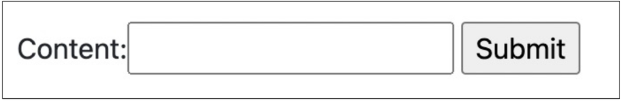

출력에서 제외한 외래키 데이터는 어디서 받아와야 할까?

detail 페이지의 url을 살펴보면 path('<mark>\<int:pk/\></mark>', views.detail, name='detail')  
url에 해당 게시글의 pk 값이 사용되고 있음  

댓글의 외래키 데이터에 필요한 정보가 바로 게시글의 pk값   

이전에 학습했던 url을 통해 변수를 넘기는 <mark>variable routing</mark>을 사용  

```python
# articles/urls.py

urlpatterns = [
    ....
    path('<int:pk>/comments/', views.comments_create, name="comments_create"),
]
```

```python
# articles/templates/articles/detail.html

<form action="{% url 'articles:comments_create' article.pk %}" method = "POST">
    {% csrf_token %}
    {{ comment_form }}
    <input type="submit" value="작성">
</form>
```

```python
# articles/views.py

def comments_create(request, pk):
    article = Article.objects.get(pk=pk)
    comment_form = CommentForm(request.POST)
    if comment_form.is_valid():
        # articles 객체는 언제 저장할 수 있을까?
        comment_form.save()
    return redirect("articles:detail", article.pk)
```

작성을 마치고 보면 articles 객체 저장이 이루어질 타이밍이 보이지 않음  

그래서 save() 메서드는 데이터ㅔ이스에 저장하기 전에 객체에 대한 추가적인 작업을 진행할 수 있도록 인스턴스 만을 반환해주는 옵션 값을 제공  

<b>The <mark>save()</mark> method</b>  

```python
save(commit=False)
```

"Create, but don't save the new instance."  

아직 데이터베이스에 저장되지 않은 인스턴스를 반환  

저장하기 전에 객체 대한 사용자 지정 처리를 수행할 때 유용하게 사용  

<a href="https://docs.djangoproject.com/en/3.2/topics/forms/modelforms/#the-save-method">https://docs.djangoproject.com/en/3.2/topics/forms/modelforms/#the-save-method</a>

save 메서드의 commit 옵션을 사용해 DB에 저장되기 전에 articles 객체 저장하기  

```python
# articles/views.py

def comments_create(request, pk):
    article = Article.objects.get(pk=pk)
    comment_form = CommentForm(request.POST)
    if comment_form.is_valid():
        comment = comment_form.save(commit=False)
        comment.article = article
        comment.save()
    return redirect("articles:detail", article.pk)
```

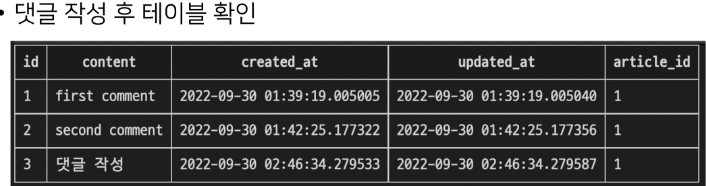

<b>READ</b>  

작성한 댓글 목록 출력하기  

특정 articles에 있는 모든 댓글을 가져온 후 context에 추가   

```python
# articles/views.py

from .models import Article, Comment

def detail(request, pk):
    article = Article.objects.get(pk=pk)
    comments = article.comment_set.all()
    comment_form = CommentForm()
    context = {'article': article,
               'comment_form': comment_form,
               'comments': comments,}
    return render(request, 'articles/detail.html', context)
```

detail 템플릿에서 댓글 목록 출력하기  

```html
# articles/detial.html
...
<h5>Comments</h5>
<ul>
    {% for comment in comments %}
        <li>{{ comment.content }}</li>
    {% endfor %}
</ul>
...
```

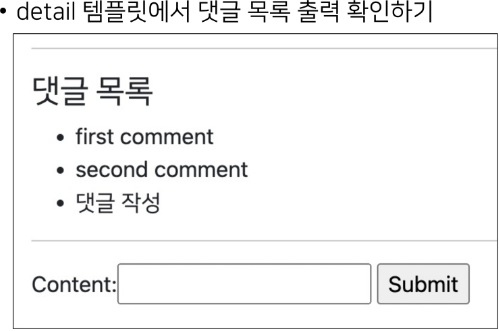

<b>DELETE</b>  

댓글 삭제 구현하기(url, view)  

```python
# articles/urls.py

urlpatterns = [
    ...
    path('<int:article_pk>/comments/<int:comment_pk>/delete/', views.comments_delete, name='comments_delete'),
]
```

```python
# articles/views.py

def comments_delete(request, article_pk, comment_pk):
    comment = Comment.objects.get(pk=comment_pk)
    comment.delete()
    return redirect("articles:detail", article_pk)
```

댓글을 삭제할 수 있는 버튼을 각각의 댓글 옆에 출력될 수 있도록 함  

```html
<!-- articles/detail.html -->
<form action="{% url 'articles:comments_delete' article.pk comment.pk %}" method="POST">
    {% csrf_token %}
    <input type="submit" value="DELETE">
</form>
```

<b>댓글 수정을 지금 구현하지 않는 이유</b>  

댓글 수정도 게시글 수정과 마찬가지로 구현이 가능  
    - 게시글 수정 페이지가 필요했떤 것처럼 댓글 수정 페이지가 필요하게 됨  

하지만 일반적으로 댓글 수정 페이지로 이동없이 페이지가 유지된 상태로 댓글 작성 Form 부분만 변경되어 수정할 수 있더록 함  

이처럼 페이지의 일부만 업데이트하는 것은 JavaScript의 영역이기 때문에 JavaScript를 학습한 후 별도로 진행하도록 함  

### Comment 추가 사항  

<b>개요</b>  

댓글에 관련된 아래 2가지 사항을 작성하면서 마무리  

1. 댓글 개수 출력하기
    1. DTL filter -length 사용
    2. Queryset API - count 사용  

2. 댓글이 없는 경우 대체 컨텐츠 출력하기  

&nbsp;

<b>댓글 개수 출력하기</b>  

1. DTL filter -length(사용)

```html
{{ comment|length }}

{{ articles.comment_set.all | length }}
```

2. Queryset API - count() 사용

```html

{{ comment.count }}  

{{ articles.comment_set.count }}
```

&nbsp;

detail 템플릿에 작성하기  

```html
articles/templates/articles/detail.html

<h5>Comments</h5>
{% if comments %}
    <p><b>{{ comments|length }}개의 댓글이 있습니다.</b></p>
{% endif %}
```

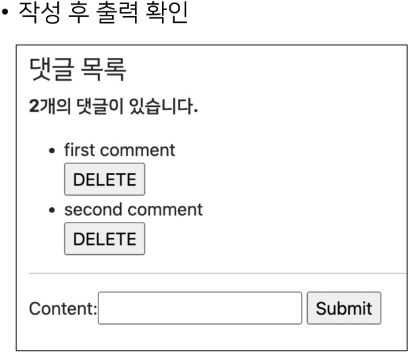

<b>댓글이 없는 경우 대체 컨텐츠 출력하기</b>

DTL <mark>for empty</mark> 활용하기  

```html
{% for comment in comments %}
    <ul>
    <li>{{ comment.content }}</li>
    <form action="{% url 'articles:comments_delete' article.pk comment.pk %}" method="POST">
        {% csrf_token %}
        <input type="submit" value="DELETE">
    </form>
    </ul>
{% empty %}
    <p>댓글이 없어요...</p>
{% endfor %}
```

### N:1 (Article - User)

<b>개요</b>  

Article(N) - User(1)  

Article 모델과 User 모델 간 관계 설정  

"0개 이상의 게시글은 1개의 회원에 의해 작성될 수 있음"  



### Referencing the User model

<b>Django에서 User 모델을 참조하는 방법</b>  

1. settings.AUTH_USER_MODEL
2. get_user_model()


&nbsp;

1. settings.AUTH_USER_MODEL
- 반환 값: 'accounts.User' (문자열)  
- User 모델에 대한 외래 키 또는 M:N 관계를 정의할 때 사용  
- <mark>models.py의 모델 필드에서 User 모델을 참조할 때 사용</mark>

2. get_user_model()
- 반환 값: User Object (객체)  
- 현재 활성화(active)된 User 모델을 반환  
- 커스터마이징한 User 모델이 있을 경우는 Custom User 모델, 그렇지 않으면 User을 반환  
- <mark>models.py가 아닌 다른 모든 곳에서 유저 모델을 참조할 때 사용</mark>

### 모델 관계 설정  

<b>Article과 User간 모델 관계 설정</b>  

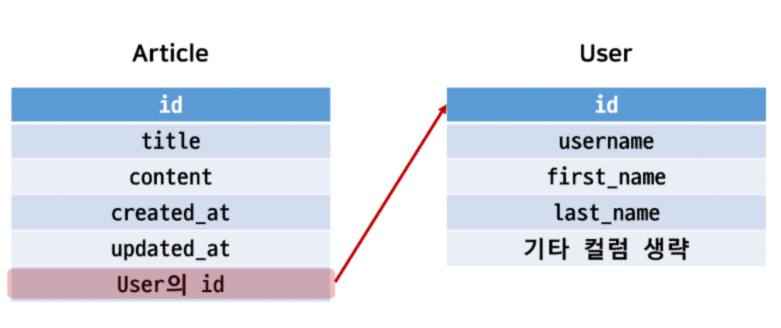

Articles 모델에 User 모델을 참조하는 외래키 작성  

```python
# articles/models.py

from django.conf import settings

class Article(models.Model):
    users = models.ForeignKey(settings.AUTH_USER_MODEL, on_delete=models.CASCADE)
    ...
```

<b>Migration 진행</b>  

기존에 존재하던 테이블에 새로운 컬럼이 추가되어야 하는 상황이기 때문에  
migrations 파일이 곧바로 만들어지지 않고 일련의 과정이 필요함  

```bash
$python manage.py makemigrations
```

```bash
$ python manage.py makemigrations
You are trying to add a non-nullable field 'users' to article without a default; we can't do that (the database needs something to populate existing rows).  
Please select a fix:  
 1) Provide a one-off default now (will be set on all existing rows with a null value for this column)       
 2) Quit, and let me add a default in models.py  
```
첫 번째 화면  
- 기본적으로 모든 컬럼은 NOT NULL 제약조건이 있기 때문에 데이터가 없이는 새로 추가되는 외래키 필드 user_id가 생성되지 않음  
- 그래서 기본값을 어떻게 작성할 것인지 선택해야 함  
- 1을 입력하고 Enter 진행 (다음 화면에서 직접 기본 값 입력)  

&nbsp;

```bash
Please select a valid option: 1
Please enter the default value now, as valid Python
The datetime and django.utils.timezone modules are available, so you can do e.g. timezone.now
Type 'exit' to exit this prompt
```

두 번째 화면  
- articles의 user_id에 어떤 데이터를 넣을 것인지 직접 입력해야 함  
- 마찬가지로 1 입력하고 Enter 진행  
- 그러면 기존에 작성된 게시글이 있담녀 모두 1번 회원이 작성한 것으로 처리됨  

&nbsp;

migrations 파일 생성 후 migrate 진행  

``` bash
$python manage.py migrate
```

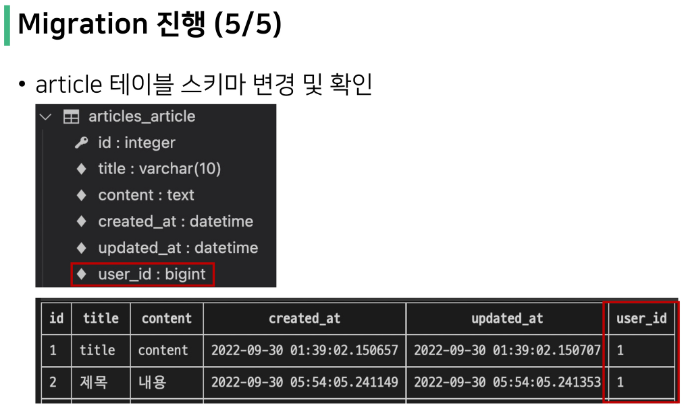


<b>Django에서 User 모델을 참조하는 방법 정리</b>  

문자열 객체를 반환하느 특징과 Django의 내부적인 실행 원리에 관련된 것이므로 이렇게만 외우도록 한다.  

User 모델을 참조할 때  
- models.py에서는 settings.AUTH_USER_MODEL
- 다른 모든 곳에서 get_user_model()

### CREATE

<b>개요</b>  

인증된 회원의 게시글 작성 구현하기  

작성하기 전에 로그인을 먼저 진행한 상태로 진행  

&nbsp;

<b>ArticleForm</b>  

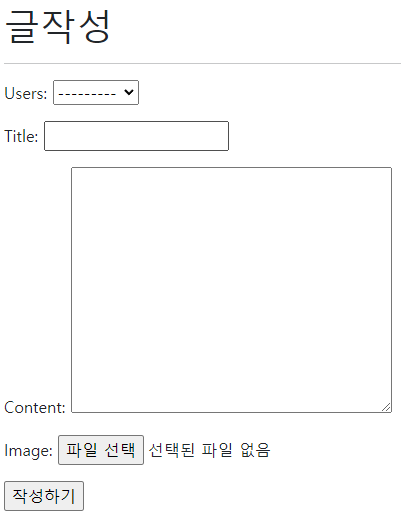

ArticleForm 출력을 확인해보면 create 템플릿에서 불필요한 필드(user)가 출력됨  

이전에 CommentForm에서 외래키 필드 article이 출력되는 상황과 동일한 상황  

user 필드에 작성해야 하는 user 객체는 view 함수의 request 객체를 활용해야 함  

ArticleForm의 출력 필드 수정   

```python
# articles/forms.py

class ArticleForm(forms.ModelForm):
    class Meta:
        model = Article
        fields = ('title', 'content',)
```

수정 확인 후 게시글 작성하기  

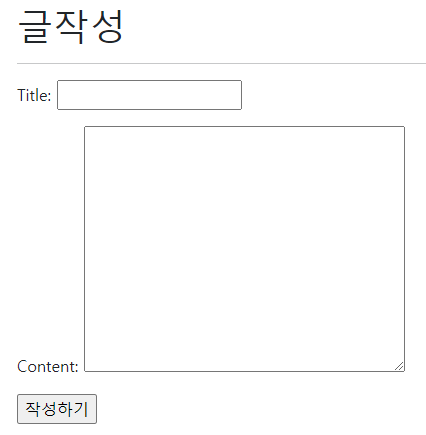

<b>외래 키 데이터 누락</b>  

게시글 작성 시 NOT NULL constraint failed: articles_article.user_id 에러 발생  

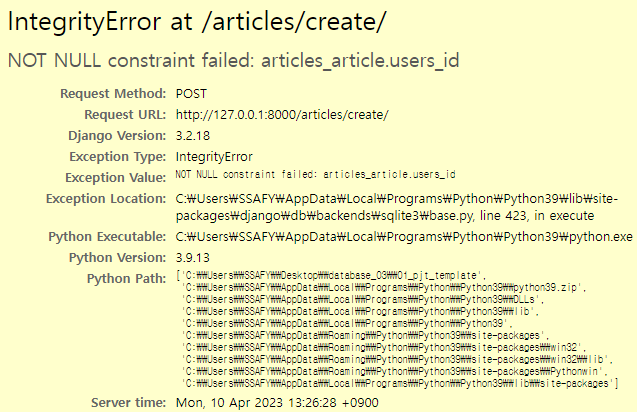

"NOT NULL 제약 조건이 실패했다. articles_article 테이블의 user_id 컬럼에서"  

게시글 작성 시 외래키에 저장되어야 할 작성자 정보가 누락 되었기 때문

게시글 작성 시 작성자 정보가 함께 저장될 수 있도록 save의 commit 옵션을 활용  

```python
# articles/views.py

def create(request):
    if request.method == 'POST':
        form = ArticleForm(request.POST, request.FILES)
        if form.is_valid():
            article = form.save(commit=False)
            article.user = request.user
            article.save()
            return redirect('articles:detail', article.pk)
    else:
        form = ArticleForm()

    context = {'form': form}
    return render(request, 'articles/create.html', context)
```

수정 후 게시글이 잘 작성되는지 확인  

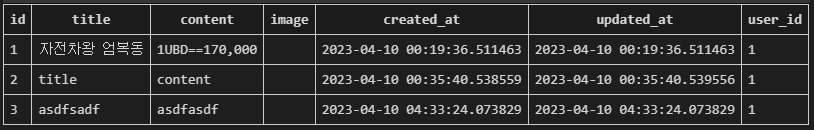

### Delete

<b>게시글 삭제 시 작성자 확인</b>  

이제 게시글에는 작성자 정보가 함께 들어있기 때문에 현재 삭제를 요청하려는 사람과  
게시글을 작성한 사람을 비교하여 본인의 게시글만 삭제할 수 있도록 함  

```python
# articles/views.py

def delete(request, pk):
    article = Article.objects.get(pk=pk)
    if request.user.is_authenticated:
        if request.user == article.user:
            article.delete()
            return redirect('articles:index')
    return redirect('articles:detail', article.pk)
```

### UPDATE

<b>게시글 수정 시 작성자 확인</b>  

수정도 마찬가지로 수정을 요청하려는 사람과 게시글 작성한 사람을 비교하여 본인의 게시글만 수정할 수 있도록 함  

```python
# articles/views.py

def update(request, pk):
    article = Article.objects.get(pk=pk)

    if request.user == article.user:
        if request.method == 'POST':
            form = ArticleForm(request.POST, request.FILES, instance=article)
            if form.is_valid():
                form.save()
                return redirect('articles:detail', pk=article.pk)
        else:
            form = ArticleForm(instance=article)
    
        context = {'form': form, 'article': article}
        return render(request, 'articles/update.html', context)

    else:
        return redirect('articles:index')

```

&nbsp;

추가로 해당 게시글의 작성자가 아니라면, 수정/삭제 버튼을 출력하지 않도록 함  

```html
<!-- articles/templates/articles/detail.html -->

{% if request.user == article.user %}
<a href="{% url 'articles:update' article.pk %}">수정하기</a>
<form action="{% url 'articles:delete' article.pk %}" id="delete-form">
    {% csrf_token %}
    <input type="submit" value="삭제하기" id="delete-btn" />
</form>
{% endif %}
```

### READ

<b>게시글 작성자 출력</b>  

index 템플릿과 detail 템플릿에서 각 게시글의 작성자 출력  

```html
<!-- articles/tempaltes/articles/index.html -->

...
{% for article in articles %}
<p><b>작성자: {{ article.user }}</b></p>
<p>
    [{{article.id}}] <a href="{% url 'articles:detail' article.pk %}" id="article-title">{{article.title}}</a>
</p>
<hr />
{% endfor %}
...
```

```html
articles/templates/articles/detail.html

<div id="article-content">
    <p><b>작성자 : {{ article.user }}</b></p>
    <p>글 제목 : {{article.title}}</p>
    <p>글 내용 : {{article.content}}</p>
    <p>생성시각 : {{article.created_at}}</p>
    <p>수정시각 : {{article.updated_at}}</p>
    ...
</div>
```